## Импорт библиотек и загрузка данных + очистка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv"
df = pd.read_csv(DIAMONDS_DATASET)

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

median_carat = df['carat'].median()

df['carat'].fillna(median_carat, inplace=True)

median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

median_depth = round(df['y'].median(),2)

df['y'].fillna(median_depth, inplace=True)

df['cut'] = df['cut'].replace('Goood', 'Good')

In [3]:
df_copy = df.copy()

In [4]:
len(df_copy)

53805

In [5]:
df_copy.describe()

,carat,depth,table,price,x,y,z
count,53805.000000,53805.000000,53805.000000,53805.000000,53805.000000,53805.000000,53805.000000
mean,0.796586,61.749280,57.458089,3933.562829,5.731325,5.734698,3.538800
std,0.471000,1.415741,2.233612,3988.926733,1.120912,1.141347,0.705205
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
df_copy["cut"] = df_copy["cut"].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})

In [8]:
df_copy["clarity"] = df_copy["clarity"].replace({'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 2, 'IF': 1})

In [9]:
dummies = pd.get_dummies(df_copy["color"], prefix="color", dtype=int)
df_copy = pd.concat([df_copy.drop(columns=["color"]), dummies], axis=1)

In [10]:
df_copy.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,6,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,4,5,59.8,61.0,326.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,2,3,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,4,4,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,2,6,63.3,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,0,1


In [11]:
corr = df_copy.corr(method="pearson")

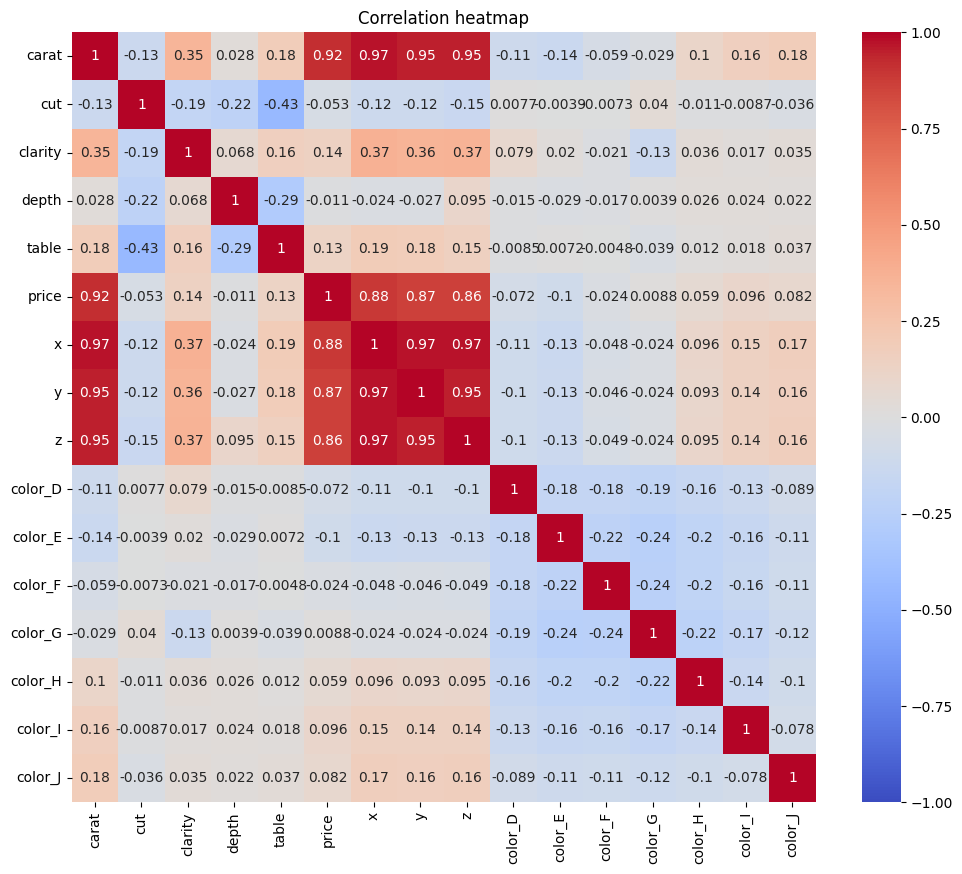

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()


In [47]:
df_copy.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,1,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,0,1


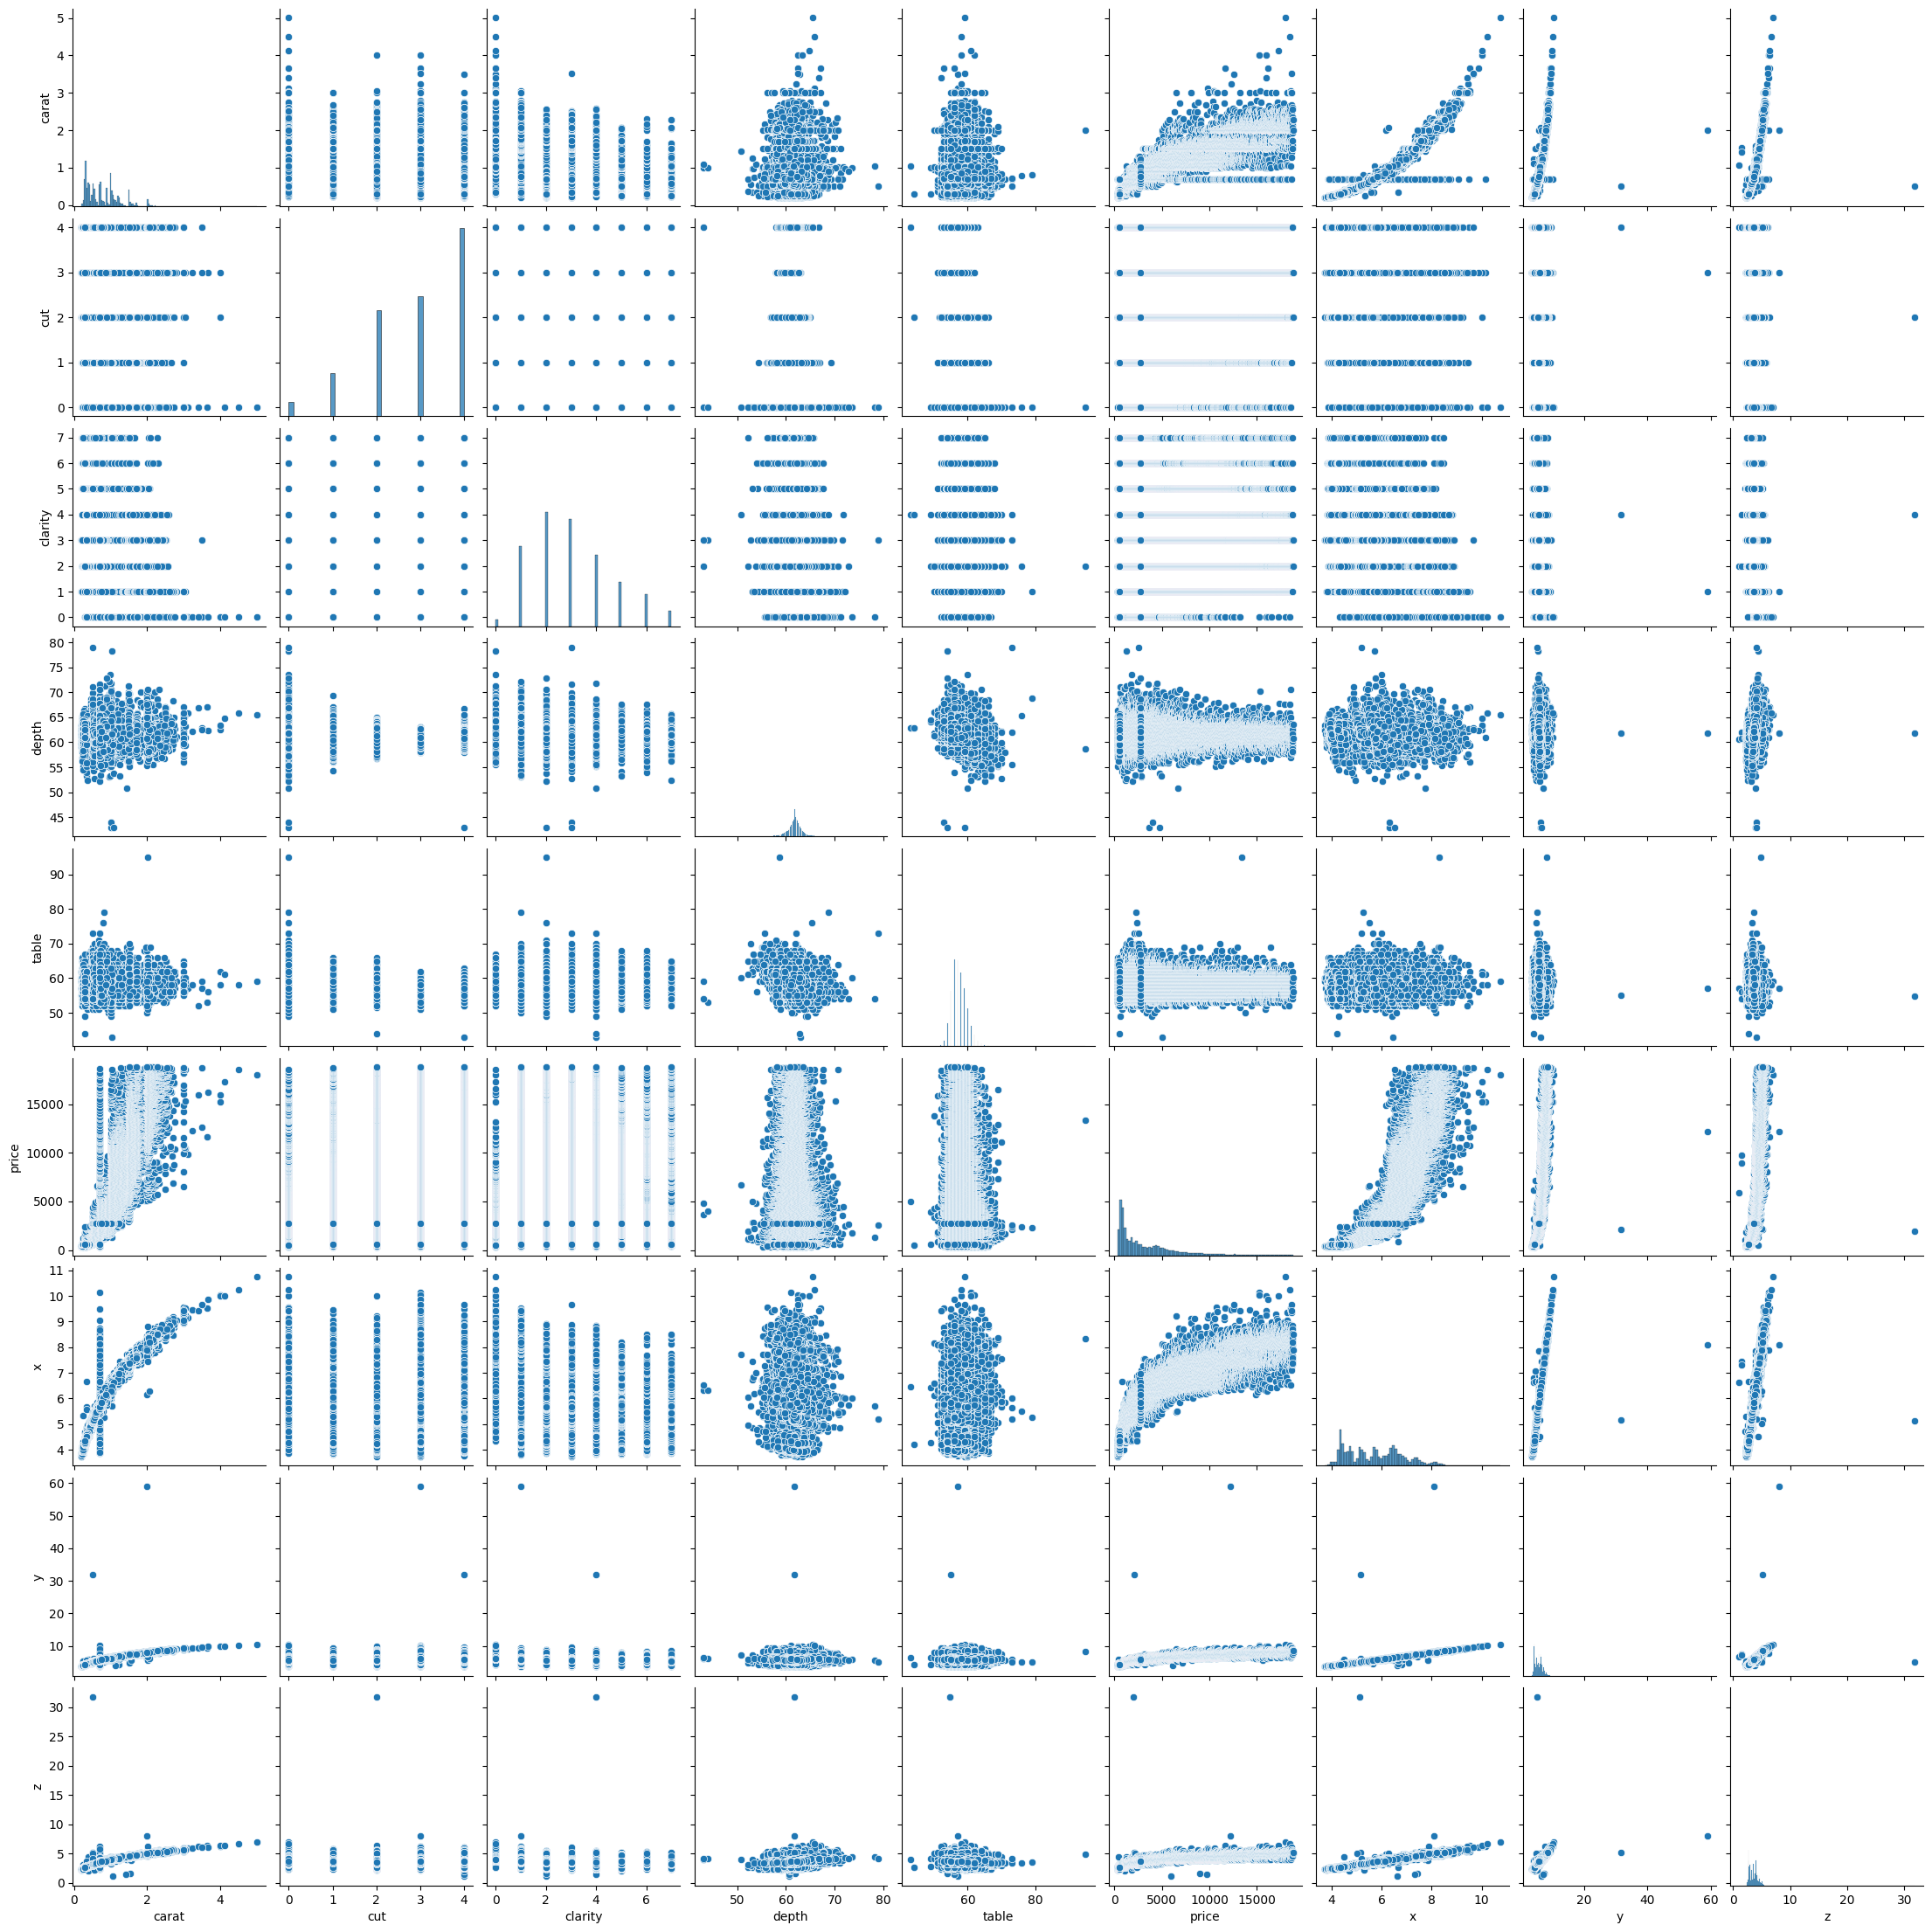

In [53]:
semi_df = df_copy[['carat', 'cut', 'clarity', 'depth','table','price','x','y','z']]
sns.pairplot(semi_df)

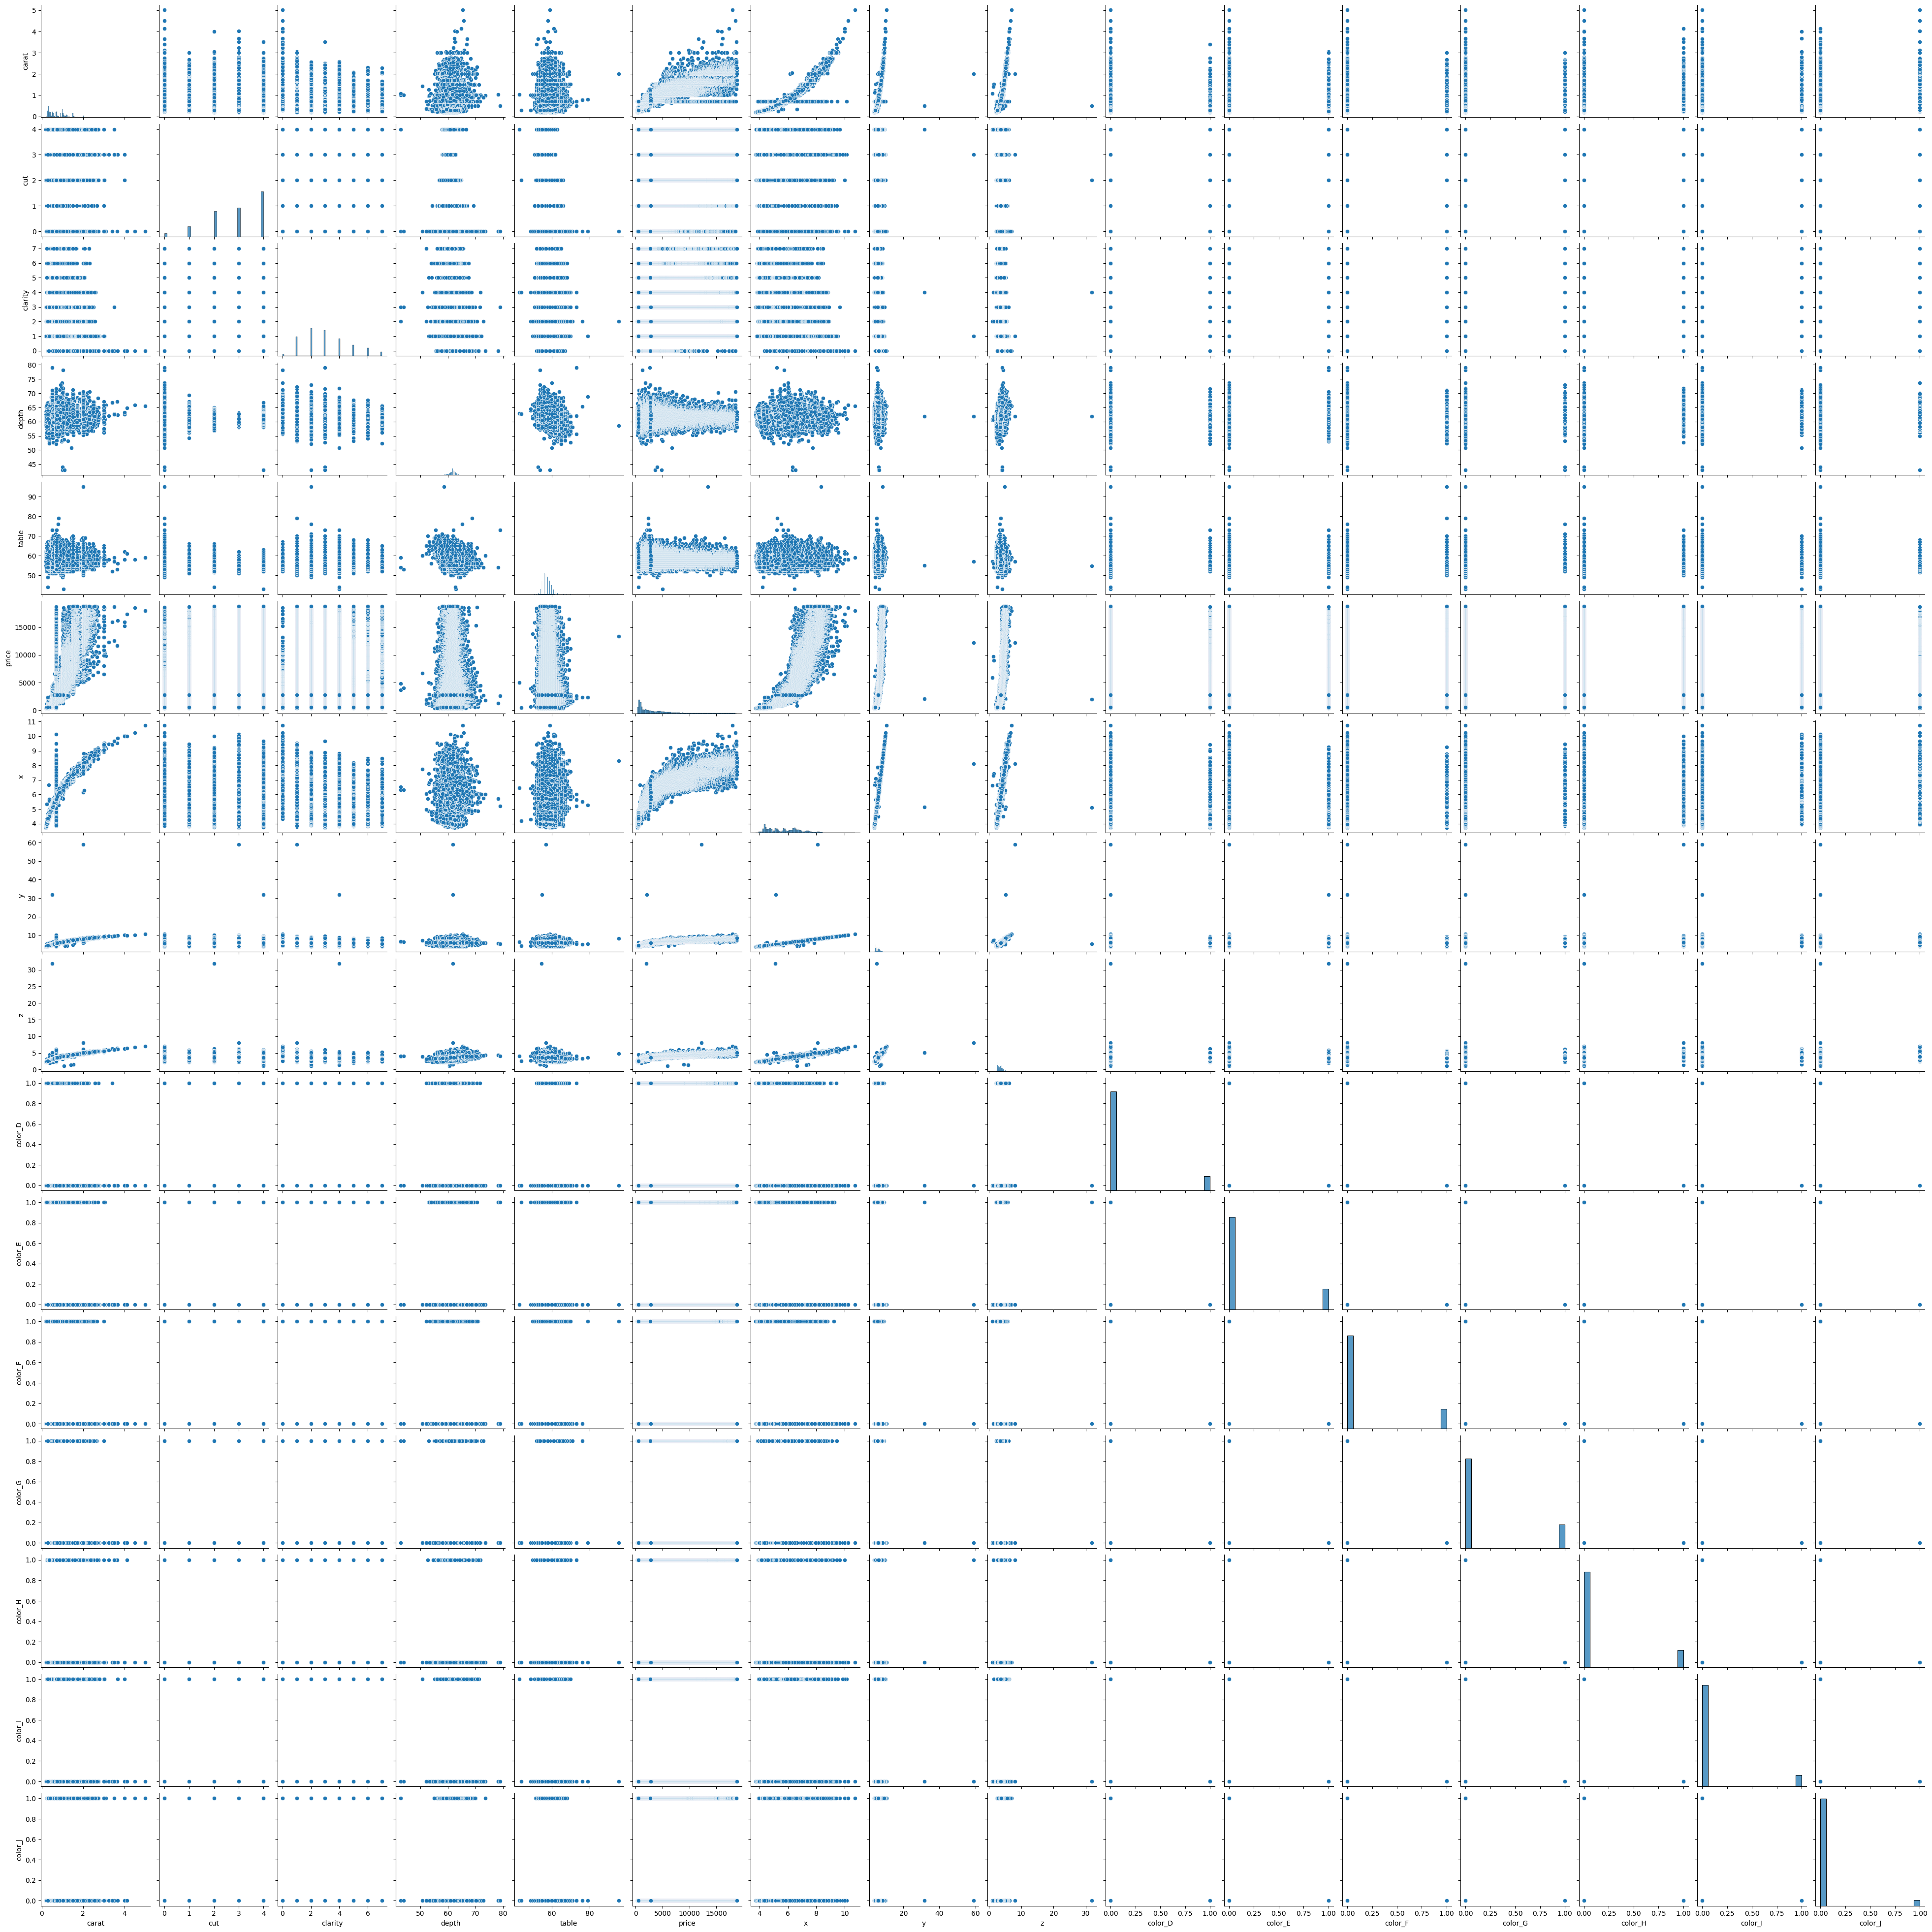

In [ ]:
sns.pairplot(df_copy)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


X = df_copy.drop(columns=["price"])
y = df_copy["price"]                


In [14]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [15]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [16]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    random_state=42
)
gb.fit(X, y)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [18]:
import numpy as np
import pandas as pd

coefs = model.coef_
feature_importance = pd.Series(
    coefs,
    index=X.columns,
    name="importance"
).sort_values(ascending=False)

print(feature_importance)


carat      8.937552e+03
cut        1.149764e+02
y          6.899758e+01
z         -3.499810e+00
table     -2.160239e+01
depth     -4.673109e+01
x         -1.235177e+02
clarity   -5.759829e+02
color_D   -1.570137e+13
color_E   -1.570137e+13
color_F   -1.570137e+13
color_G   -1.570137e+13
color_H   -1.570137e+13
color_I   -1.570137e+13
color_J   -1.570137e+13
Name: importance, dtype: float64


In [19]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns,
    name="importance"
).sort_values(ascending=False)

print(importances)


y          0.864568
clarity    0.062255
carat      0.017823
color_J    0.011006
x          0.008902
color_I    0.007796
z          0.006414
color_H    0.005624
depth      0.003171
color_D    0.002743
color_G    0.002428
table      0.002340
color_E    0.001737
cut        0.001625
color_F    0.001567
Name: importance, dtype: float64


In [20]:
importances = pd.Series(
    gb.feature_importances_,
    index=X.columns,
    name="importance"
).sort_values(ascending=False)

print(importances)

y          0.810515
z          0.075142
clarity    0.058949
carat      0.015500
x          0.014912
color_J    0.009757
color_I    0.005375
color_D    0.002725
color_F    0.002250
color_H    0.001929
color_E    0.001191
color_G    0.000771
depth      0.000480
cut        0.000429
table      0.000074
Name: importance, dtype: float64


In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf,          # уже обученная модель
    X, y,   # валидационный набор
    n_repeats=10,
    random_state=42
)

sres = result
importances_mean = result.importances_mean
importances_std = result.importances_std


In [22]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    gb,          # уже обученная модель
    X, y,   # валидационный набор
    n_repeats=10,
    random_state=42
)

sres = result
importances_mean = result.importances_mean
importances_std = result.importances_std


In [23]:
importances_mean = pd.Series(
    result.importances_mean,
    index=X.columns,
    name="importance_mean"
).sort_values(ascending=False)

importances_std = pd.Series(
    result.importances_std,
    index=X.columns,
    name="importance_std"
)

print(pd.DataFrame({'mean': importances_mean, 'std':importances_std}))


             mean       std
carat    0.500953  0.002917
clarity  0.149121  0.001172
color_D  0.008825  0.000253
color_E  0.007167  0.000225
color_F  0.004093  0.000057
color_G  0.000677  0.000036
color_H  0.003089  0.000050
color_I  0.011342  0.000156
color_J  0.022655  0.000306
cut      0.001948  0.000050
depth    0.001457  0.000040
table    0.000139  0.000011
x        0.028908  0.000278
y        0.868295  0.002045
z        0.078276  0.000458


In [103]:
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53800    2757.0
53801    2757.0
53802    2757.0
53803    2757.0
53804    2757.0
Name: price, Length: 53786, dtype: float64

In [130]:
df_copy

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,7,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,4,6,59.8,61.0,326.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,2,4,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,4,5,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,2,7,63.3,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,0.72,5,6,60.8,57.0,2757.0,5.75,5.76,3.50,1,0,0,0,0,0,0
53801,0.72,2,6,63.1,55.0,2757.0,5.69,5.75,3.61,1,0,0,0,0,0,0
53802,0.70,3,6,62.8,60.0,2757.0,5.66,5.68,3.56,1,0,0,0,0,0,0
53803,0.86,4,7,61.0,58.0,2757.0,6.15,6.12,3.74,0,0,0,0,1,0,0


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_copy.drop(columns=["price"])
y = df_copy["price"]          
      
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

importance_df = pd.DataFrame(
{
'feature': X.columns,
'coefficient': model.coef_,
'abs_coefficient': np.abs(model.coef_)
}
).sort_values('abs_coefficient', ascending=False)

importance_df = importance_df.reset_index(drop=True)

importance_df

,feature,coefficient,abs_coefficient
0,color_G,-2.941280e+14,2.941280e+14
1,color_E,-2.787748e+14,2.787748e+14
2,color_F,-2.758995e+14,2.758995e+14
3,color_H,-2.608198e+14,2.608198e+14
4,color_D,-2.395556e+14,2.395556e+14
5,color_I,-2.173950e+14,2.173950e+14
6,color_J,-1.606269e+14,1.606269e+14
7,carat,4.214269e+03,4.214269e+03
8,clarity,-8.431503e+02,8.431503e+02
9,x,-1.390702e+02,1.390702e+02


In [25]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_copy[['y','clarity']]
y = df_copy["price"]       

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


r2 = r2_score(y_test, y_pred)                    
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", r2)
print("MAPE:", mape)


R2: 0.8160097330647819
MAPE: 0.5857142256674689


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_copy[['cut', 'carat', 'clarity']]
y = df_copy["price"]       

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


r2 = r2_score(y_test, y_pred)                    
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", r2)
print("MAPE:", mape)


R2: 0.8784184588651093
MAPE: 0.436151198942276
